In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
df = pd.read_csv("/content/Books_with_descriptions.csv")

<ipython-input-24-29316f7f537f>:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Books_with_descriptions.csv")


In [ ]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,description
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Classical mythology is a literary genre that e...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan is a novel that explores themes o...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,"""Decision in Normandy"" is a historical fiction..."
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,"""Flu"" is a non-fiction historical narrative th..."
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,The Mummies of Urumchi is a dark fantasy novel...


In [ ]:
# drop unnecessary columns

df.drop(['ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-L'], axis=1, inplace=True)

In [ ]:
df

,Book-Title,Image-URL-M,description
0,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...,Classical mythology is a literary genre that e...
1,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,Clara Callan is a novel that explores themes o...
2,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...,"""Decision in Normandy"" is a historical fiction..."
3,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...,"""Flu"" is a non-fiction historical narrative th..."
4,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...,The Mummies of Urumchi is a dark fantasy novel...
...,...,...,...
271355,There's a Bat in Bunk Five,http://images.amazon.com/images/P/0440400988.0...,NaN
271356,From One to One Hundred,http://images.amazon.com/images/P/0525447644.0...,NaN
271357,Lily Dale : The True Story of the Town that Ta...,http://images.amazon.com/images/P/006008667X.0...,NaN
271358,Republic (World's Classics),http://images.amazon.com/images/P/0192126040.0...,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Book-Title   271360 non-null  object
 1   Image-URL-M  271360 non-null  object
 2   description  20500 non-null   object
dtypes: object(3)
memory usage: 6.2+ MB


In [ ]:
# drop all the rows with empty description

df = df.dropna(subset=['description'])
df

,Book-Title,Image-URL-M,description
0,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...,Classical mythology is a literary genre that e...
1,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,Clara Callan is a novel that explores themes o...
2,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...,"""Decision in Normandy"" is a historical fiction..."
3,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...,"""Flu"" is a non-fiction historical narrative th..."
4,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...,The Mummies of Urumchi is a dark fantasy novel...
...,...,...,...
20495,War Letters : Extraordinary Correspondence fro...,http://images.amazon.com/images/P/0743410068.0...,War Letters is a collection of personal letter...
20496,The Burglar in the Rye: A Bernie Rhodenbarr My...,http://images.amazon.com/images/P/0451198476.0...,"In ""The Burglar in the Rye,"" a clever and char..."
20497,Karen's Little Witch (Baby-Sitters Little Sist...,http://images.amazon.com/images/P/0590448331.0...,Karen's Little Witch is a fantasy novel that f...
20498,Jelly Belly,http://images.amazon.com/images/P/0440442079.0...,"Jelly Belly is a sugary, colorful, and chewy c..."


In [ ]:
df_new = df.copy()
df_new['description_word_count'] = df_new['description'].apply(lambda x: len(str(x).split()))

df_new

,Book-Title,Image-URL-M,description,description_word_count
0,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...,Classical mythology is a literary genre that e...,26
1,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,Clara Callan is a novel that explores themes o...,33
2,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...,"""Decision in Normandy"" is a historical fiction...",35
3,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...,"""Flu"" is a non-fiction historical narrative th...",39
4,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...,The Mummies of Urumchi is a dark fantasy novel...,31
...,...,...,...,...
20495,War Letters : Extraordinary Correspondence fro...,http://images.amazon.com/images/P/0743410068.0...,War Letters is a collection of personal letter...,43
20496,The Burglar in the Rye: A Bernie Rhodenbarr My...,http://images.amazon.com/images/P/0451198476.0...,"In ""The Burglar in the Rye,"" a clever and char...",48
20497,Karen's Little Witch (Baby-Sitters Little Sist...,http://images.amazon.com/images/P/0590448331.0...,Karen's Little Witch is a fantasy novel that f...,36
20498,Jelly Belly,http://images.amazon.com/images/P/0440442079.0...,"Jelly Belly is a sugary, colorful, and chewy c...",16


In [ ]:
# longest book description is of 79 words

max_description_length = max(df_new['description_word_count'])
max_description_length

79

In [ ]:
# shortest book description is of 14 words

min_description_length = min(df_new['description_word_count'])
min_description_length

14

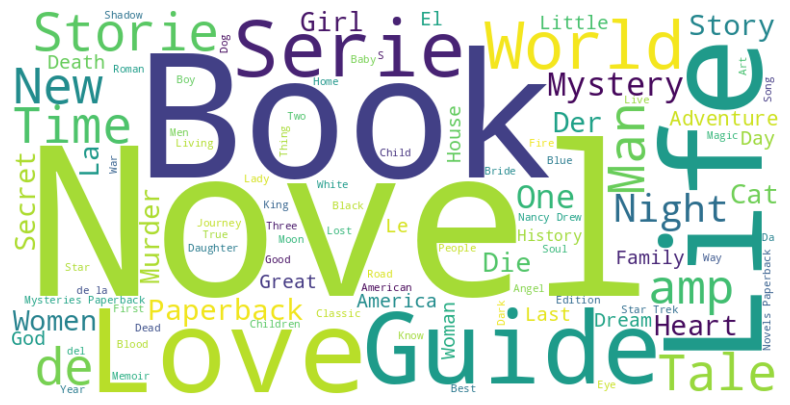

In [ ]:
# word cloud of Book title

text = ' '.join(df_new['Book-Title'].dropna())
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

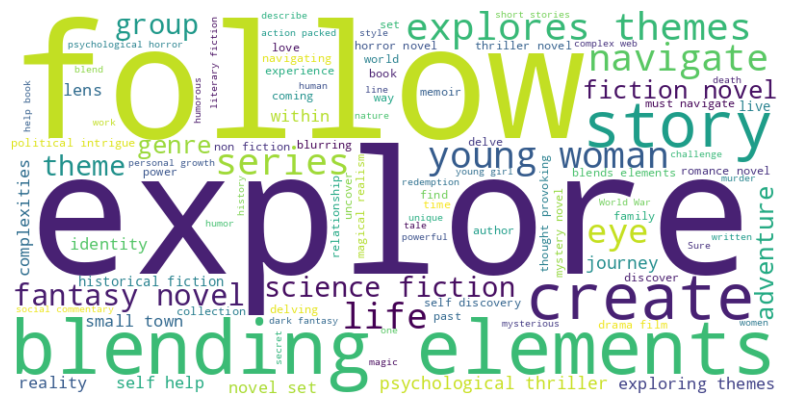

In [ ]:
# word cloud of description
text = ' '.join(df_new['description'].dropna())
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('books_with_valid_descriptions.csv', index=False)
files.download('books_with_valid_descriptions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>